# MAT281
## Aplicaciones de la Matemática en la Ingeniería

In [1]:
# Configuración para plots inline
%matplotlib inline

## __Intrucciones__

* Completa tus datos personales (nombre y rol USM).
* Debes enviar este .ipynb con el siguiente formato de nombre: 08_lab_clasificacion_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .
* Se evaluará:
    - Soluciones
    - Código
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
    - La escala es de 0 a 4 considerando solo valores enteros.
* __La entrega es al final de esta clase.__

__Nombre__: Quentin Carbonnelle

__Rol__: 201990422-1

## Observación

Este laboratorio utiliza la librería sklearn (oficialmente llamada [scikit learn](http://scikit-learn.org/stable/)), de la cual utilizaremos el método de clasificación **k Nearest Neighbors**.

## Problema: clasificación de dígitos
En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.

El repositorio con los datos se encuentra en el siguiente [link](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), pero los datos ya han sido incluídos en el directorio `data/`. 

## Contenido

El laboratorio consiste de 4 secciones:
0. Explicación de k Neirest Neighbours
1. Exploración de los datos.
2. Entrenando el modelo kNN.
3. Estimación del error de predicción de dígitos utilizando kNN.

# ¿Qué es k Neirest Neighbours?

El algoritmo **k Nearest Neighbors** es un método no paramétrico: una vez que el parámetro $k$ se ha fijado, no se busca obtener ningún parámetro adicional.

Sean los puntos $x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)$  de etiqueta $y^{(i)}$ conocida, para $i=1, ..., m$.

El problema de clasificación consiste en encontrar la etiqueta de un nuevo punto $x=(x_1, ..., x_m)$ para el cual no conocemos la etiqueta.

La etiqueta de un punto se obtiene de la siguiente forma:
* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 

El modelo subyacente a kNN es el conjunto de entrenamiento completo. A diferencia de otros métodos que efectivamente generalizan y resumen la información (como regresión logística, por ejemplo), cuando se necesita realizar una predicción, el algoritmo kNN mira **todos** los datos y selecciona los k datos más cercanos, para regresar la etiqueta más popular/más común. Los datos no se resumen en parámetros, sino que siempre deben mantenerse en memoria. Es un método por tanto que no escala bien con un gran número de datos.

En caso de empate, existen diversas maneras de desempatar:
* Elegir la etiqueta del vecino más cercano (problema: no garantiza solución).
* Elegir la etiqueta de menor valor (problema: arbitrario).
* Elegir la etiqueta que se obtendría con $k+1$ o $k-1$ (problema: no garantiza solución, aumenta tiempo de cálculo).

La cercanía o similaridad entre los datos se mide de diversas maneras, pero en general depende del tipo de datos y del contexto.

* Para datos reales, puede utilizarse cualquier distancia, siendo la **distancia euclidiana** la más utilizada. También es posible ponderar unas componentes más que otras. Resulta conveniente normalizar para poder utilizar la noción de distancia más naturalmente.

* Para **datos categóricos o binarios**, suele utilizarse la distancia de Hamming.

A continuación, una implementación de "bare bones" en numpy:

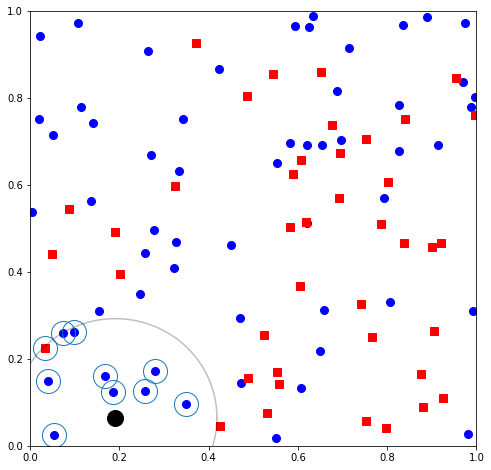

Prediccion realizada para etiqueta del punto = 0 (circulo azul)


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os

# Parámetros
k = 10

def knn_search(X, k, x):
    """ find K nearest neighbours of data among D """
    # Distancia euclidiana
    d = np.sqrt(((X - x[:,:k])**2).sum(axis=0))
    # Ordenar por cercania
    idx = np.argsort(d)
    # Regresar los k mas cercanos
    id_closest = idx[:k] 
    return id_closest, d[id_closest].max()

def knn(X,Y,k,x):
    # Obtener los k mas cercanos
    k_closest, dmax = knn_search(X, k, x)
    # Obtener las etiquetas
    Y_closest = Y[k_closest]
    # Obtener la mas popular
    counts = np.bincount(Y_closest.flatten())
    #print(counts)
    # Regresar la mas popular (cualquiera, si hay empate)
    return np.argmax(counts)

N = 100
X = np.random.rand(2,N) # random dataset
Y = np.array(np.random.rand(N)<0.4, dtype=int).reshape((N,1)) # random dataset
x = np.random.rand(2,1) # query point

# performing the search
neig_idx, dmax = knn_search(X, k, x)
y = knn(X, Y, k, x)    
    
# plotting the data and the input point
fig = plt.figure(figsize=(8,8))
plt.plot(x[0,0],x[1,0],'ok', ms=16)
m_ob = Y[:,0]==0
plt.plot(X[0,m_ob], X[1,m_ob], 'ob', ms=8)
m_sr = Y[:,0]==1
plt.plot(X[0,m_sr],X[1,m_sr],'sr', ms=8)

# highlighting the neighbours
plt.plot(X[0,neig_idx], X[1,neig_idx], 'o', markerfacecolor='None', markersize=24, markeredgewidth=1)

# Plot a circle
x_circle = dmax*np.cos(np.linspace(0,2*np.pi,360)) +  x[0,0]
y_circle = dmax*np.sin(np.linspace(0,2*np.pi,360)) +  x[1,0]
plt.plot(x_circle, y_circle, 'k', alpha=0.25)
# Show all
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Print result
if y==0:
  print("Prediccion realizada para etiqueta del punto = {} (circulo azul)".format(y))
else:
  print("Prediccion realizada para etiqueta del punto = {} (cuadrado rojo)".format(y))

Puedes ejecutar varias veces el código anterior, variando el número de vecinos `k` para ver cómo afecta el algoritmo.

## 1. Exploración de los datos

Los datos se encuentran en 2 archivos, `data/optdigits.train` y `data/optdigits.test`. Como su nombre lo indica, el set `data/optdigits.train` contiene los ejemplos que deben ser usados para entrenar el modelo, mientras que el set `data/optdigits.test` se utilizará para obtener una estimación del error de predicción.

Ambos archivos comparten el mismo formato: cada línea contiene 65 valores. Los 64 primeros corresponden a la representación de la imagen en escala de grises (0-blanco, 255-negro), y el valor 65 corresponde al dígito de la imagen (0-9).

Código para mostrar los archivos en un directorio

In [3]:
import os

In [4]:
%%bash
ls data

Couldn't find program: 'bash'


Código para revisar un archivo (reemplazar por cualquiera de los archivos de interés).

In [5]:
%%bash
cat data/optdigits.names.txt

Couldn't find program: 'bash'


Código para mostrar las primeras líneas del archivo

In [6]:
%%bash
head data/optdigits.train

Couldn't find program: 'bash'


#### 1.1 Cargando los datos en numpy

Para cargar los datos, utilizamos np.loadtxt con los parámetros extra delimiter (para indicar que el separador será en esta ocasión una coma) y con el dype np.int8 (para que su representación en memoria sea la mínima posible, 8 bits en vez de 32/64 bits para un float).

In [7]:
import numpy as np
import os

filepath = os.path.join("data", "optdigits.train")
XY_tv = np.loadtxt(filepath, delimiter=",", dtype=np.int8)
print(XY_tv)

[[ 0  1  6 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 [ 0  0  8 ...  0  0  7]
 ...
 [ 0  0  3 ...  0  0  6]
 [ 0  0  6 ...  5  0  6]
 [ 0  0  2 ...  0  0  7]]


In [8]:
# Split into X (values) and Y (labels)
X_tv = XY_tv[:,:64]
Y_tv = XY_tv[:, 64]
# Some printings
print(X_tv.shape)
print(Y_tv.shape)
print(X_tv[0,:])
print(X_tv[0,:].reshape(8,8))
print(Y_tv[0])

(3823, 64)
(3823,)
[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]
0


#### 1.1 (bis) Cargando los datos en pandas

Para cargar los datos, también sería posible utilizar pandas. Sin embargo, como el archivo no tiene encabezado, necesitaremos crear nombres para las columnas, además de indicar el separador y tipo de datos.

In [9]:
import pandas as pd
import os

filepath = os.path.join("data", "optdigits.train")
col_names = ["c{:02d}".format(i) for i in range(65)]
df_XY_tv = pd.read_csv(filepath, names=col_names, sep=",", dtype=np.int8)
print(df_XY_tv)

      c00  c01  c02  c03  c04  c05  c06  c07  c08  c09  ...  c55  c56  c57  \
0       0    1    6   15   12    1    0    0    0    7  ...    0    0    0   
1       0    0   10   16    6    0    0    0    0    7  ...    0    0    0   
2       0    0    8   15   16   13    0    0    0    1  ...    0    0    0   
3       0    0    0    3   11   16    0    0    0    0  ...    0    0    0   
4       0    0    5   14    4    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3818    0    0    5   13   11    2    0    0    0    2  ...    0    0    0   
3819    0    0    0    1   12    1    0    0    0    0  ...    0    0    0   
3820    0    0    3   15    0    0    0    0    0    0  ...    0    0    0   
3821    0    0    6   16    2    0    0    0    0    0  ...    0    0    0   
3822    0    0    2   15   16   13    1    0    0    0  ...    0    0    0   

      c58  c59  c60  c61  c62  c63  c64  
0       6   14    7  

In [10]:
# Split into X (values) and Y (labels)
XY_tv = df_XY_tv.values
X_tv = XY_tv[:,:64]
Y_tv = XY_tv[:, 64]
# Some printings
print(X_tv.shape)
print(Y_tv.shape)
print(X_tv[0,:])
print(X_tv[0,:].reshape(8,8))
print(Y_tv[0])

(3823, 64)
(3823,)
[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]
0


Como ya hemos mencionado anteriormente, pandas tiene la ventaja de poseer el método `describe` para obtener un rápido resumen de los datos.

In [11]:
df_XY_tv.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
c00,3823.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
c01,3823.0,0.301334,0.866986,0.0,0.0,0.0,0.0,8.0
c02,3823.0,5.481821,4.631601,0.0,1.0,5.0,9.0,16.0
c03,3823.0,11.805912,4.259811,0.0,10.0,13.0,15.0,16.0
c04,3823.0,11.451478,4.537556,0.0,9.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
c60,3823.0,11.461156,4.991934,0.0,9.0,13.0,16.0,16.0
c61,3823.0,6.700497,5.775815,0.0,0.0,6.0,12.0,16.0
c62,3823.0,2.105676,4.028266,0.0,0.0,0.0,2.0,16.0
c63,3823.0,0.202197,1.150694,0.0,0.0,0.0,0.0,16.0


#### 1.2 Visualizando los datos

Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

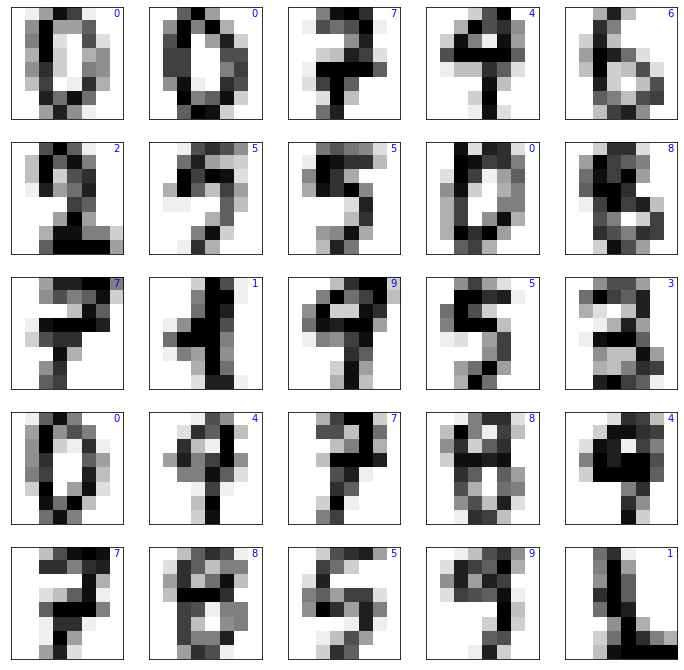

In [12]:
from matplotlib import pyplot as plt

# Well plot the first nx*ny examples
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_tv[index,:].reshape(8,8)
        label = Y_tv[index]
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(7, 0, str(int(label)), horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

## 2. Entrenando el modelo

#### 2.1 Entrenamiento trivial

Entrenaremos el modelo con 1 vecino y verificaremos el error de predicción en el set de entrenamiento.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)
Y_pred = kNN.predict(X_tv)
n_errors = sum(Y_pred!=Y_tv)
print("Hay %d errores de un total de %d ejemplos de entrenamiento" %(n_errors, len(Y_tv)))

Hay 0 errores de un total de 3823 ejemplos de entrenamiento


## Desafío 1
¿Porqué el error de entrenamiento es 0 en el modelo?

The training set used in kNN.fit() is the same as the test set used in kNN.predict() and because we just used the single nearest neighbour it will always be the same point with thus the same Y value.



#### 2.2 Buscando el valor de k más apropiado

A partir del análisis del punto anterior, nos damos cuenta de la necesidad de:
1. Calcular el error en un set distinto al utilizado para entrenar.
2. Calcular el mejor valor de vecinos para el algoritmo.

## Desafío 2

Complete el código entregado a continuación, de modo que se calcule el error de predicción como el porcentaje de aciertos de kNN, para k entre 1 y 10 (ambos incluidos). 

Realice una división en set de entrenamiento (75%) y de validación (25%), y calcule el valor promedio y desviación estándar del error de predicción (en porcentaje), tomando al menos 20 repeticiones para cada valor de k.

OBS: Ejecución de la celda debería tomar alrededor de 5 minutos.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Spoiler alert #

print("Paciencia. Debería tomar algunos minutos.")
template = "k={0:,d}: {1:.2f} +- {2:.2f} errores de clasificación de un total de {3:,d} puntos"
# Fitting the model
mean_error_for_k = []
std_error_for_k = []
mask = np.array([False] * (int(len(Y_tv)*0.25)) + [True] * (len(Y_tv)-int(len(Y_tv)*0.25)))
k_range = range(1,11)
for k in k_range:
    print('k :',k)
    errors_k = []
    for i in range(40):
        # Splitting the data
        np.random.shuffle(mask)
        X_train, X_valid, Y_train, Y_valid = X_tv[mask],X_tv[~mask],Y_tv[mask],Y_tv[~mask]
        # Training the model
        kNN = KNeighborsClassifier(n_neighbors=k)
        kNN.fit(X_train, Y_train)
        # Predicting values
        Y_valid_pred = kNN.predict(X_valid)
        # Count the errors
        n_errors = sum(Y_valid_pred!=Y_valid)
        # Add them to vector
        errors_k.append(100.*n_errors/len(Y_valid))

    errors = np.array(errors_k)
    print(template.format(k, errors.mean(), errors.std(), len(Y_valid)))
    mean_error_for_k.append(errors.mean())
    std_error_for_k.append(errors.std())

Paciencia. Debería tomar algunos minutos.
k : 1
k=1: 1.62 +- 0.43 errores de clasificación de un total de 955 puntos
k : 2
k=2: 2.07 +- 0.45 errores de clasificación de un total de 955 puntos
k : 3
k=3: 1.62 +- 0.38 errores de clasificación de un total de 955 puntos
k : 4
k=4: 1.65 +- 0.42 errores de clasificación de un total de 955 puntos
k : 5
k=5: 1.57 +- 0.38 errores de clasificación de un total de 955 puntos
k : 6
k=6: 1.76 +- 0.51 errores de clasificación de un total de 955 puntos
k : 7
k=7: 1.67 +- 0.34 errores de clasificación de un total de 955 puntos
k : 8
k=8: 1.88 +- 0.40 errores de clasificación de un total de 955 puntos
k : 9
k=9: 1.75 +- 0.41 errores de clasificación de un total de 955 puntos
k : 10
k=10: 1.87 +- 0.36 errores de clasificación de un total de 955 puntos


Observación: El código anterior debería dar un resultado similar al siguiente:
```
k=1: 1.62 +- 0.34 errores de clasificación de un total de 956 puntos
```

#### 2.3 Visualizado el error de predicción
Podemos visualizar los datos anteriores utilizando el siguiente código, que requiere que `sd_error_for k` y `mean_error_for_k` hayan sido apropiadamente definidos.

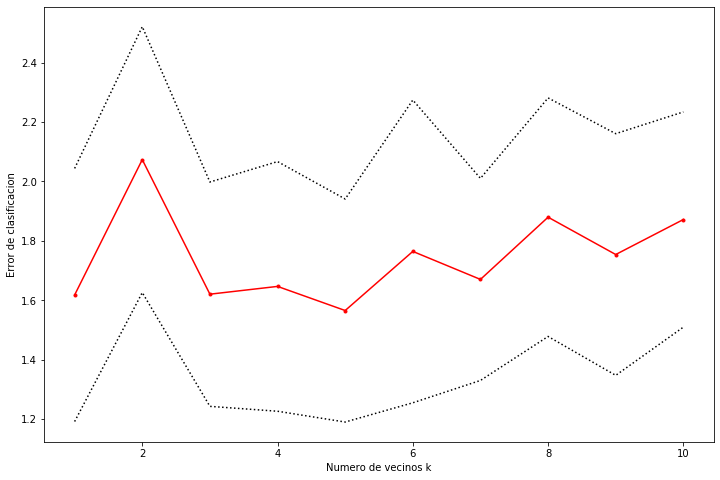

In [15]:
mean = np.array(mean_error_for_k)
std = np.array(std_error_for_k)
plt.figure(figsize=(12,8))
plt.plot(k_range, mean - std, "k:")
plt.plot(k_range, mean , "r.-")
plt.plot(k_range, mean + std, "k:")
plt.xlabel("Numero de vecinos k")
plt.ylabel("Error de clasificacion")
plt.show()

## Desafío 3
¿Qué patrón se observa en los datos, en relación a los números pares e impares? ¿Porqué sucede esto? ¿Qué valor de $k$ elegirá para el algoritmo?

When we look at the errors, the pair number of neighbours will always have a worse result than both odd numbers of neighbours if you do +1 or -1 number of neighbours. The error of classification here is the lowest when k=1 so that would be the valor of k that I would choose.


#### 2.4 Entrenando con todos los datos

A partir de lo anterior, se fija el número de vecinos $k$ y se procede a entrenar el modelo con todos los datos. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

k = 3 # Fix here, maybe
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### 2.5 Predicción en testing dataset

Ahora que el modelo kNN ha sido completamente entrenado, calcularemos el error de predicción en un set de datos completamente nuevo: el set de testing. 

## Desafío 4
Complete el código a continuación, para cargar los datos del set de entrenamiento y realizar una predicción de los dígitos de cada imagen. ***No cambie los nombres de las variables***.

In [17]:
# Cargando el archivo data/optdigits.test
filepath = os.path.join("data", "optdigits.test")
XY_test = np.loadtxt(filepath, delimiter=",", dtype=np.int8)
X_test = XY_test[:,:64]
Y_test = XY_test[:, 64]
# Predicción de etiquetas
Y_pred = kNN.predict(X_test)

#### 2.6 Visualización de etiquetas correctas
Puesto que tenemos las etiquetas verdaderas en el set de test, podemos visualizar únicamente los números que han sido correctamente etiquetados. Ejecute el código a continuación.

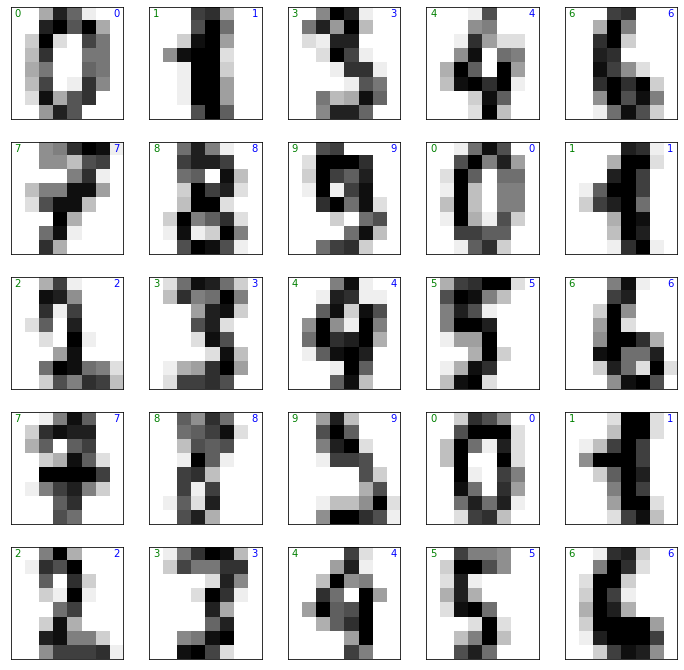

In [18]:
from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred==Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='green')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

#### 2.7 Visualización de etiquetas incorrectas
Más interesante que el gráfico anterior, resulta considerar los casos donde los dígitos han sido incorrectamente etiquetados. 

## Desafio 5
Modifique el código anteriormente provisto para que muestre los dígitos incorrectamente etiquetados, cambiando apropiadamente la máscara. Cambie también el color de la etiqueta desde verde a rojo, para indicar una mala etiquetación. 

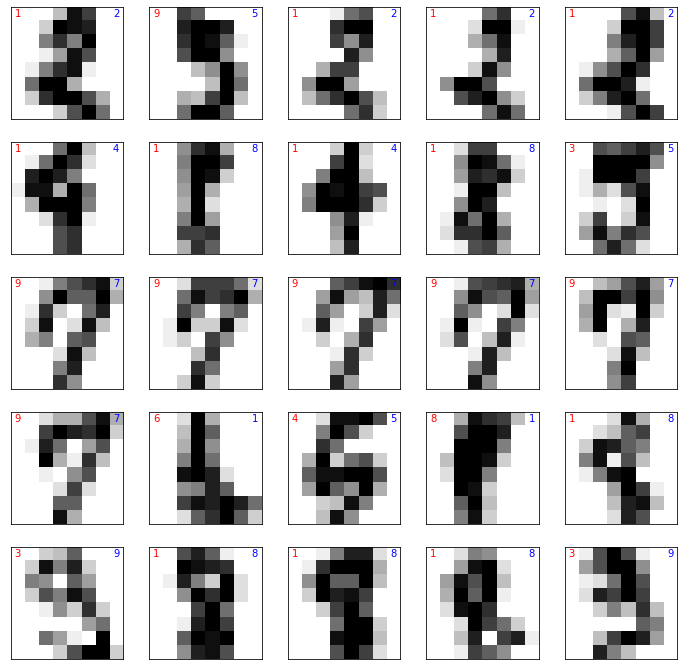

In [19]:
from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred!=Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='red')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

#### 2.8 Análisis del error

Después de la exploración visual de los resultados, estamos ansiosos de obtener el error de predicción real del modelo.

## Desafío 6
Complete el código, obteniendo el error de clasificación para cada dígito. Indique el error obtenido en su respuesta.
¿Existen dígitos más fáciles o difíciles de clasificar?

***RESPONDER AQUI***



In [22]:
# Error global
mask = (Y_pred!=Y_test)
error_prediccion =  100.*sum(mask) / len(Y_pred)
print("Error de predicción total de {:.1f}%".format(error_prediccion))

for digito in range(0,10):
    mask_digito = (Y_test==digito)
    Y_test_digito = Y_test[mask_digito] 
    Y_pred_digito = Y_pred[mask_digito]
    error_prediccion = 100.*sum((Y_pred_digito!=Y_test_digito)) / len(Y_pred_digito)
    print("Error de predicción para digito {} de {:.1f}%".format(digito, error_prediccion))

Error de predicción total de 2.2%
Error de predicción para digito 0 de 0.0%
Error de predicción para digito 1 de 1.1%
Error de predicción para digito 2 de 2.3%
Error de predicción para digito 3 de 1.1%
Error de predicción para digito 4 de 1.7%
Error de predicción para digito 5 de 1.6%
Error de predicción para digito 6 de 0.0%
Error de predicción para digito 7 de 3.9%
Error de predicción para digito 8 de 6.9%
Error de predicción para digito 9 de 3.3%


#### 2.9 Análisis del error (cont. de)

La matriz de confusión (confusion matrix) indica la relación entre las etiquetas clasificadas correcta e incorrectamente:

*Compute confusion matrix to evaluate the accuracy of a classification*
*By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.* 

Es decir, el elemento $C_{3,3}$ cuenta la cantidad de veces que el dígito 3 fue clasificado correctamente, mientras que $C_{9,7}$ indica la cantidad de veces que el dígito 9 fue incorrectamente clasificado como el digito 7.

Observación: Lo anterior corresponde a la convención utilizada por sklearn. La convención puede variar según la referencia.

El siguiente código muestra cómo clasificar el error de clasificación con la matriz de confusión:

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   4 173   0   0   0   0   0   0   0]
 [  0   0   0 181   0   0   0   1   1   0]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   1   1 179   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 172   1   6]
 [  0   9   0   1   0   0   0   0 162   2]
 [  0   0   0   4   0   1   0   0   1 174]]


<Figure size 432x288 with 0 Axes>

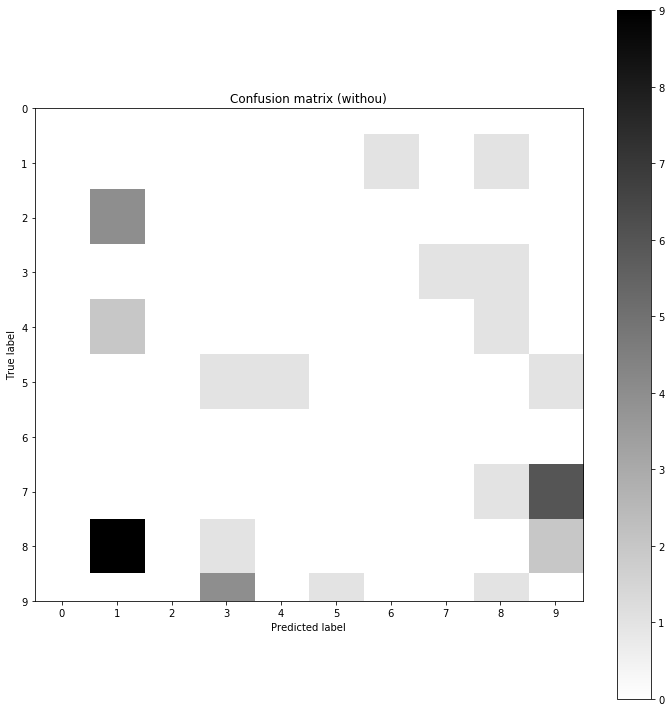

In [24]:
# As in http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, title='Confusion matrix (withou)', cmap=plt.cm.gray_r):
    cm_aux = cm - np.diag(np.diag(cm))
    plt.figure(figsize=(10,10))
    plt.imshow(cm_aux, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return None

# Compute confusion matrix
plt.figure()
plot_confusion_matrix(cm)

## Desafío 7
¿Qué puede observarse a partir de la matriz de confusión anterior?


***RESPONDER AQUI***

Se observa claramente que la etiqueta más incorrectamente clasificada es para el dígito 8, que se clasifica incorrectamente como 1.
(This response was already written)